In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [8]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [9]:
bins = [0, 25, 45, 65, 100]
names = ['Young', 'Middle', 'Senior', 'Old']
df['ageRange'] = pd.cut(df['Age'], bins, labels=names)

Text(0, 0.5, 'Age range / Income')

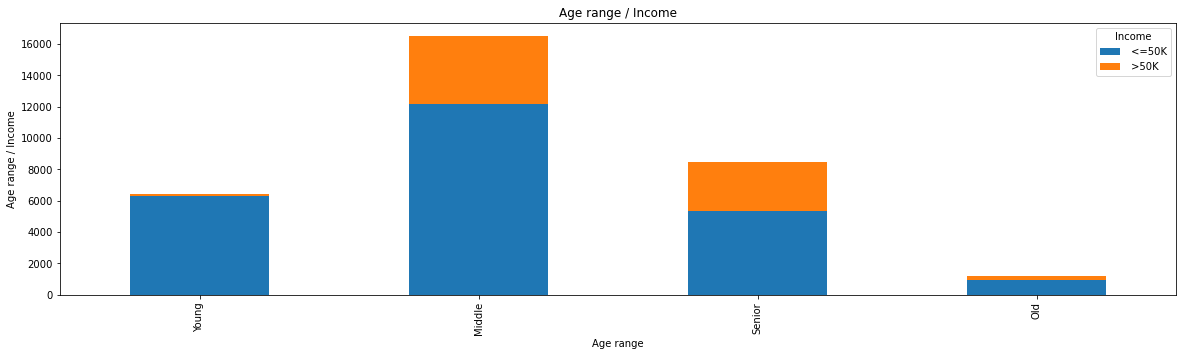

In [10]:
pd.crosstab(df.ageRange,df.Income).plot(kind='bar', figsize=(20,5), stacked=True)
plt.title('Age range / Income')
plt.xlabel('Age range')
plt.ylabel('Age range / Income')

In [11]:
df.groupby('ageRange').Income.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

ageRange  Income
Young      <=50K    98.2%
           >50K      1.8%
Middle     <=50K    73.6%
           >50K     26.4%
Senior     <=50K    63.1%
           >50K     36.9%
Old        <=50K    79.9%
           >50K     20.1%
Name: Income, dtype: object

In [12]:
df.groupby('ageRange').Race.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

ageRange  Race               
Young      White                 85.6%
           Black                  9.4%
           Asian-Pac-Islander     3.0%
           Other                  1.1%
           Amer-Indian-Eskimo     0.9%
Middle     White                 84.1%
           Black                 10.2%
           Asian-Pac-Islander     3.6%
           Amer-Indian-Eskimo     1.1%
           Other                  1.0%
Senior     White                 87.2%
           Black                  8.8%
           Asian-Pac-Islander     2.7%
           Amer-Indian-Eskimo     0.8%
           Other                  0.5%
Old        White                 89.8%
           Black                  7.0%
           Asian-Pac-Islander     2.3%
           Amer-Indian-Eskimo     0.6%
           Other                  0.3%
Name: Race, dtype: object

In [13]:
df.groupby('ageRange').Sex.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

ageRange  Sex    
Young      Male      56.0%
           Female    44.0%
Middle     Male      69.0%
           Female    31.0%
Senior     Male      71.1%
           Female    28.9%
Old        Male      66.8%
           Female    33.2%
Name: Sex, dtype: object

In [15]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

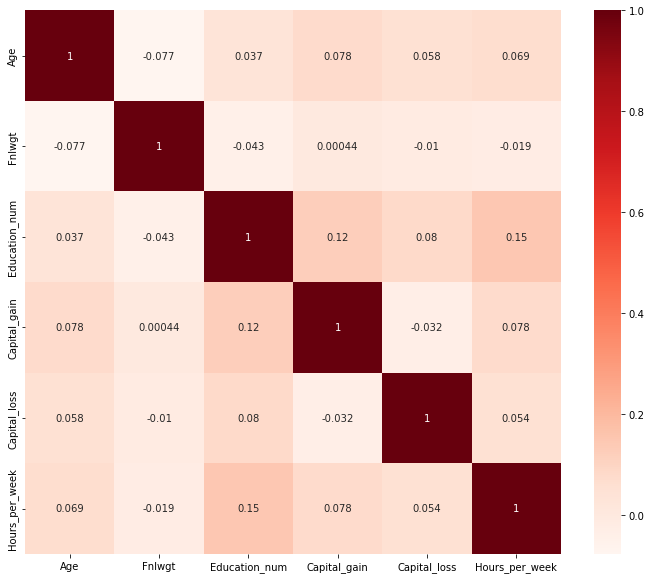

In [18]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [20]:
labeled_df = df.apply(LabelEncoder().fit_transform)
labeled_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,ageRange
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0,2
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0,2
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0,0


In [22]:
y = labeled_df["Income"]
x = labeled_df.drop("Income", axis=1)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,ageRange
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,2
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,2
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8108598548297041
[[4728  716]
 [ 639 1081]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5444
           1       0.60      0.63      0.61      1720

    accuracy                           0.81      7164
   macro avg       0.74      0.75      0.74      7164
weighted avg       0.81      0.81      0.81      7164



In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
mnb=GaussianNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8221663874930206
[[5059  385]
 [ 889  831]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5444
           1       0.68      0.48      0.57      1720

    accuracy                           0.82      7164
   macro avg       0.77      0.71      0.73      7164
weighted avg       0.81      0.82      0.81      7164

